# Using Machine Learning Tools: Workshop 2

**Chapter 1 – The Machine Learning landscape**

This workshop is a cut down version of the code accompanying Chapter 1 of
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron. All code for the book is available at https://github.com/ageron/handson-ml2

#**Opening notebooks and plotting**

First, check they have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [ ]:
# Tutor demonstration

If the Python version looks correct, try and run the below code and check if you can plot the figures.

In [ ]:
# Tutor demonstration


If the above runs and you can successfully generate the plot, try asking ChatGPT to write code for reading in the data, displaying a scatterplot, and two other types of visualisation of the data. What has it suggested? How is this different?

#**Run code to perform linear regression.**

 Run the below code and ask ChatGPT to create code to do the same thing. Create code based on last cell (model.predict) to plot the model output at a series of regularly spaced points, and check that you land on the red line from the previous cell.

 Then, retrain on a randomly chosen subset of the data (50% of it, but not just the first half - random selection) and show the results of the model fit on the full data and the model fit on the random subset on the same plot.

In [ ]:
# Tutor demonstration

#**Exploring with different data**

Spend this time running more versions with different data: different randomly selected percentages and/or adding an individual extra point that does not lie on the regression line (and controlling how far from the line it is). Repeat this many times with different random samples and/or added points (with different distance from the line).


## Extension: How you can check the error of a model?

In a first gaze, we can check the error of a model visually, however we can use different `metrics` in order to check properly the performance of a model. For instance, we can use the the **Mean Square Error** for a regression problem. We will see more `metrics` in future workshops.

$$MSE(y,\hat{y}) = \frac{1}{n_{samples}}\sum_{i=0}^{n_{samples}-1} (y_i-\hat{y}_i)^{2}$$


In [ ]:
# Tutor demonstration

## What now?

* Looking for something more challenging, try to perform the **Activity 8: More Experiments** available in MyUni.

## Optional

You can explore a much long version of this code in the next Jupyter Notebook available in Google Colab.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
raw_df = pd.read_csv('workshop2.csv')

In [89]:
raw_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [90]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [91]:
raw_df.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.648344,28.656928,537.870553,1425.379942,499.539680,3.870623,206855.816909
std,2.003532,3.200177,12.848021,421.385070,1132.583966,382.329753,1.899920,115395.615874
min,-124.350000,32.540000,1.000000,1.000000,-999.000000,1.000000,-0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,378.000000,400.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [92]:
df = raw_df.drop(['ocean_proximity'], axis=1)

In [93]:
df['total_rooms'] = pd.to_numeric(df['total_rooms'], errors='coerce')

In [94]:
df = df.dropna()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19426 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19426 non-null  float64
 1   latitude            19426 non-null  float64
 2   housing_median_age  19426 non-null  int64  
 3   total_rooms         19426 non-null  float64
 4   total_bedrooms      19426 non-null  float64
 5   population          19426 non-null  int64  
 6   households          19426 non-null  int64  
 7   median_income       19426 non-null  float64
 8   median_house_value  19426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

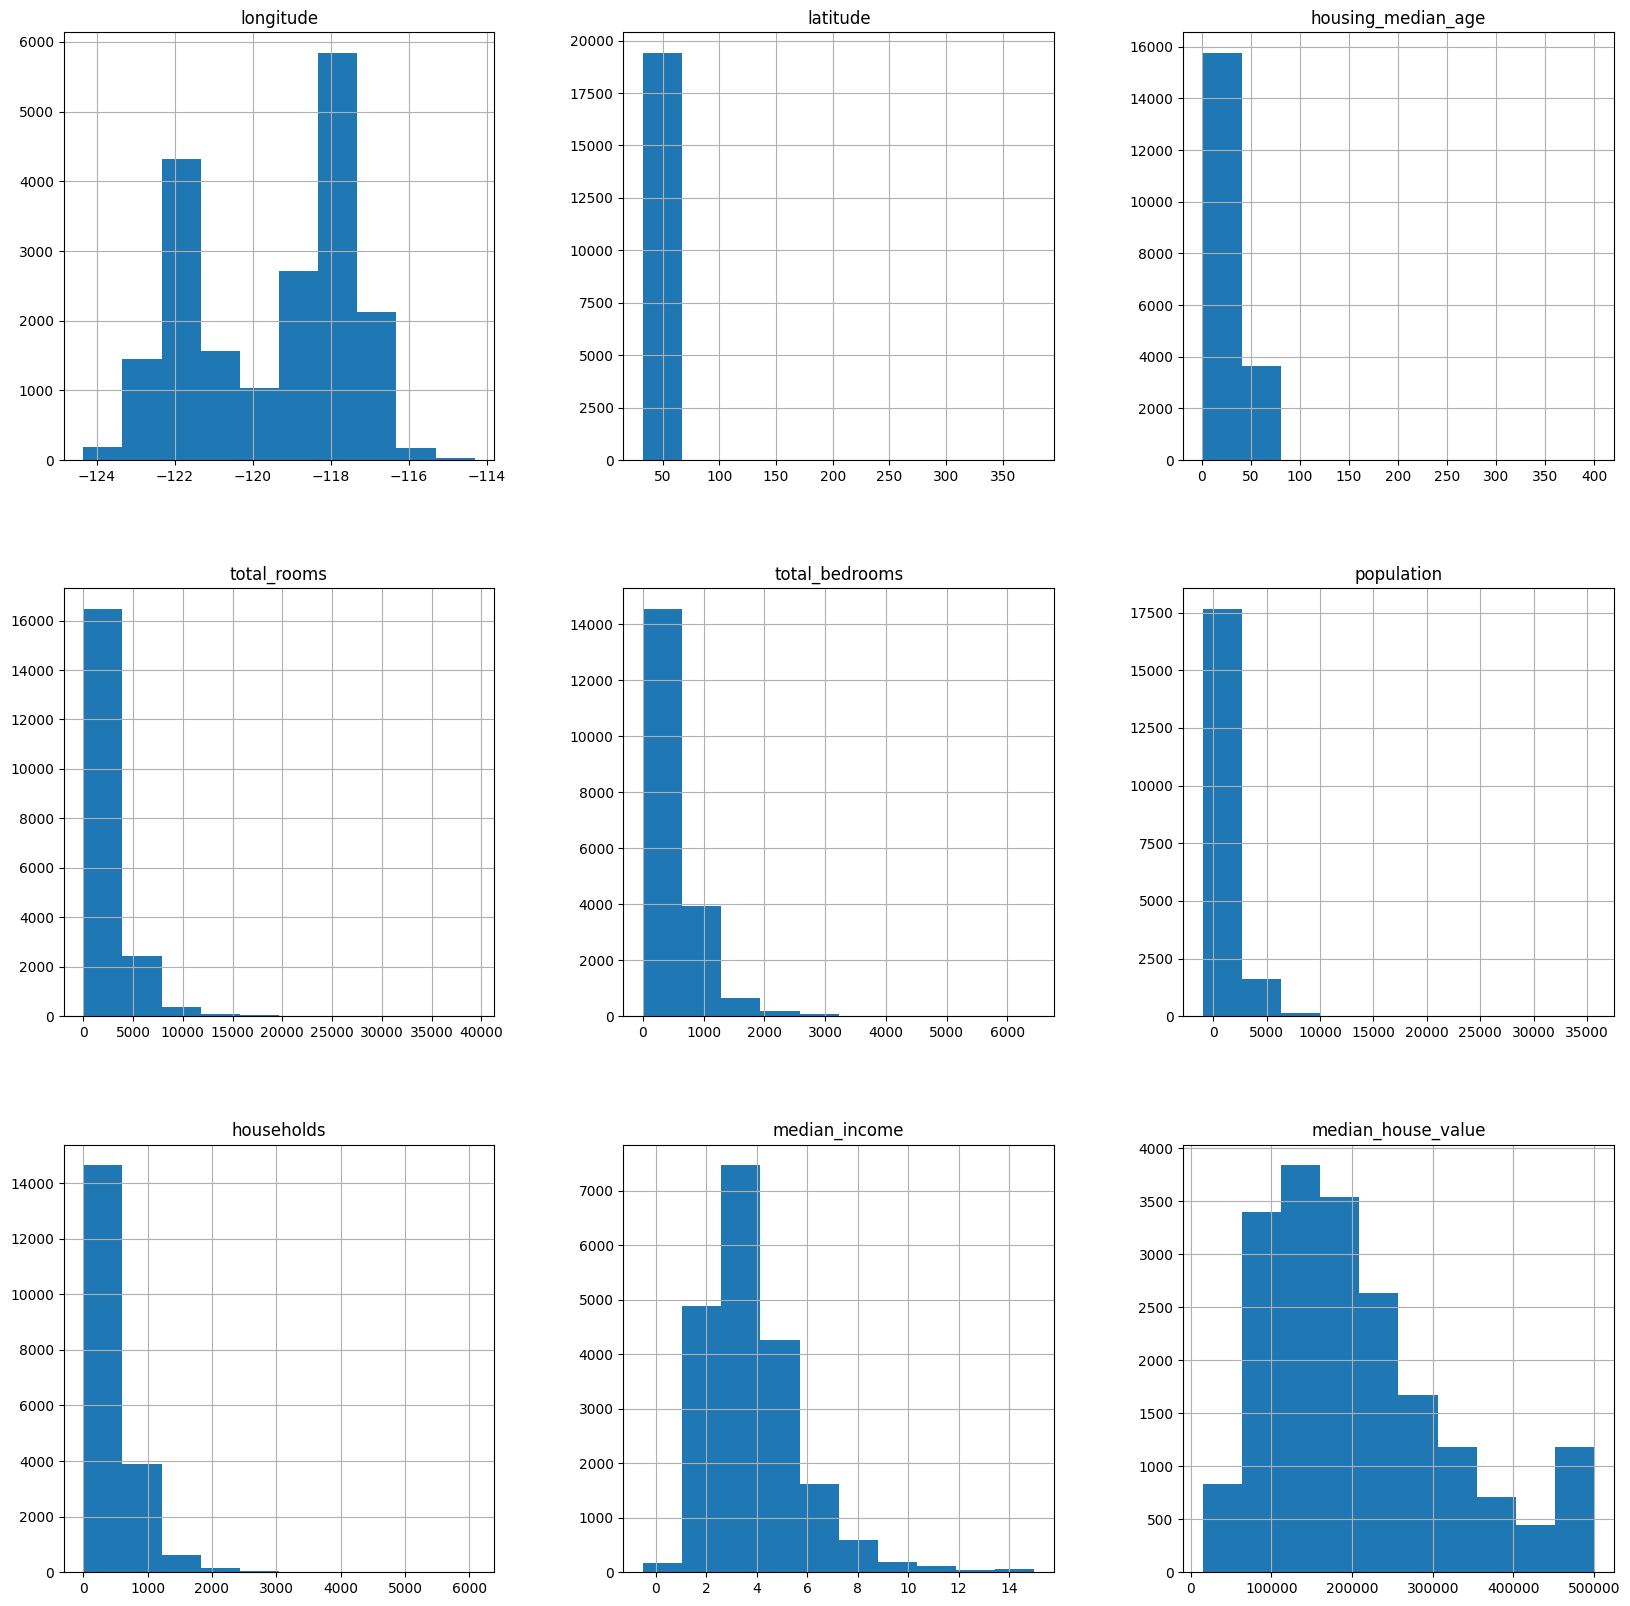

In [96]:
df.hist(figsize=(20,20))

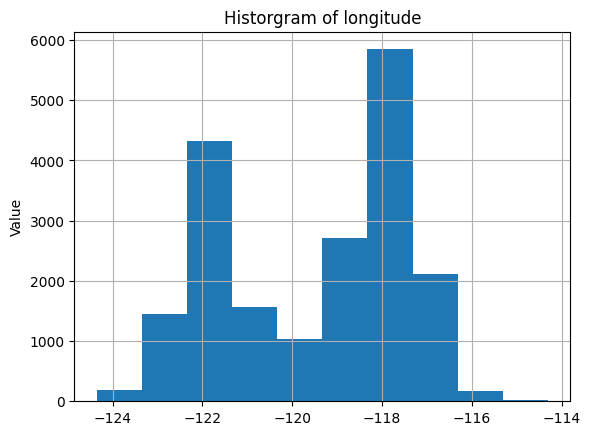

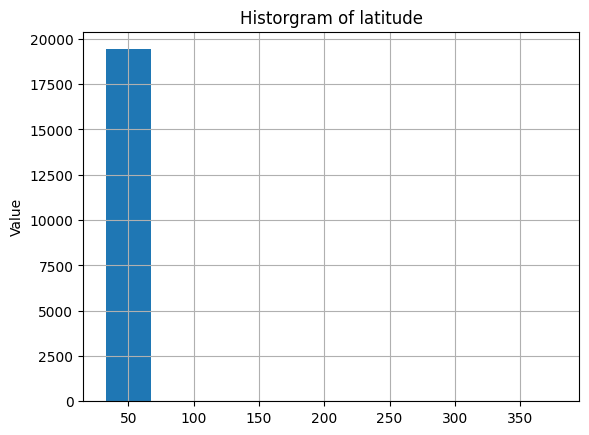

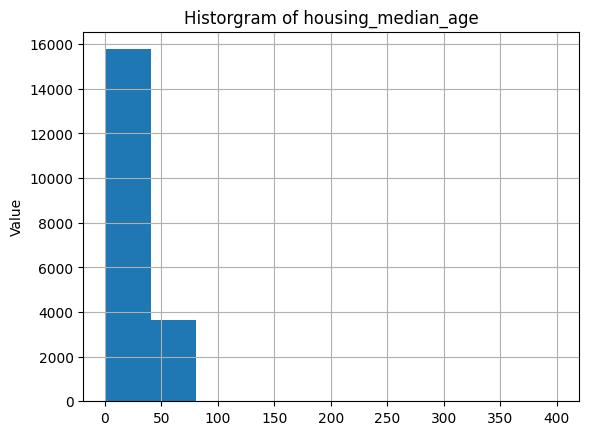

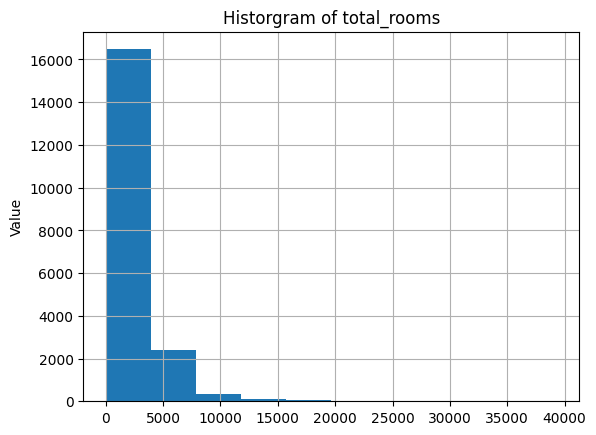

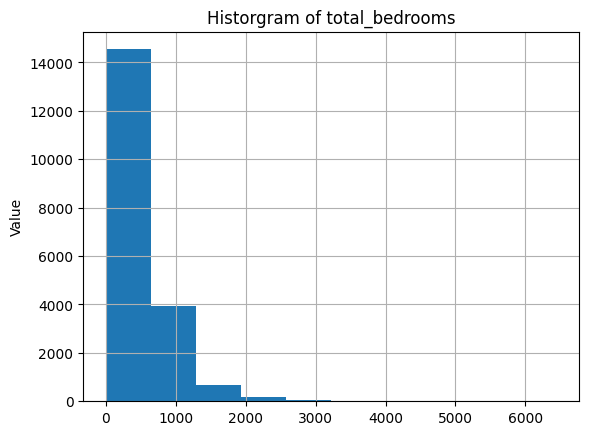

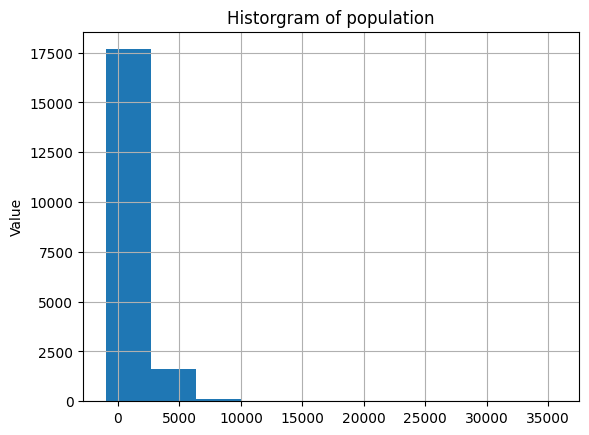

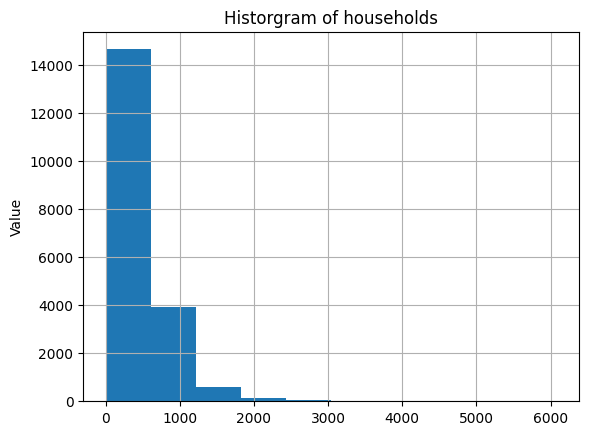

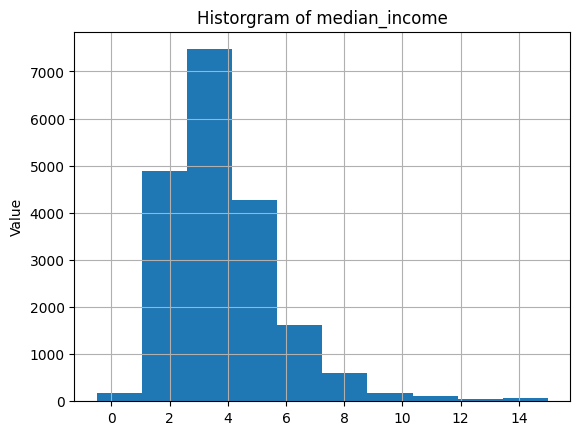

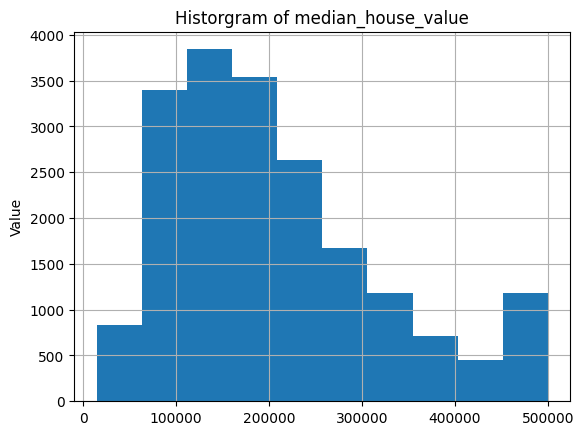

In [97]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column])
    plt.title(f'Historgram of {column}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

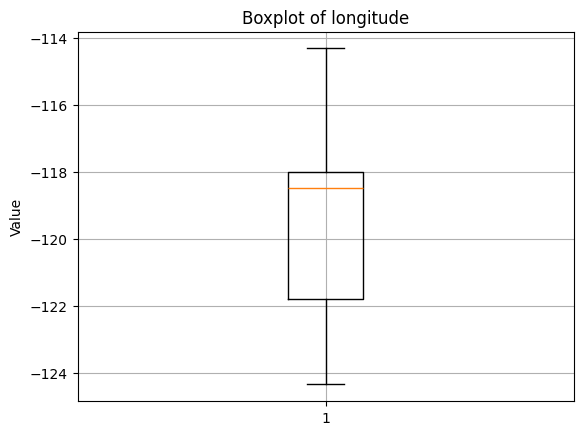

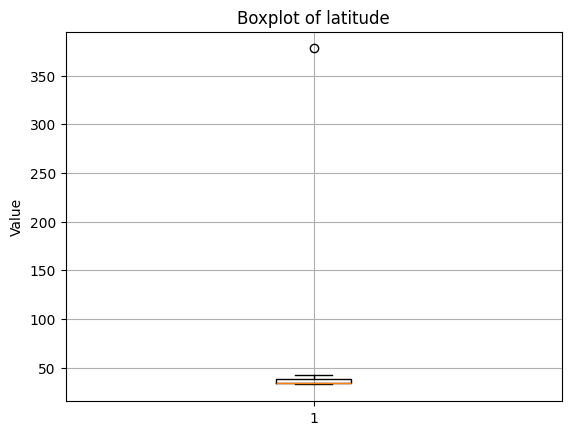

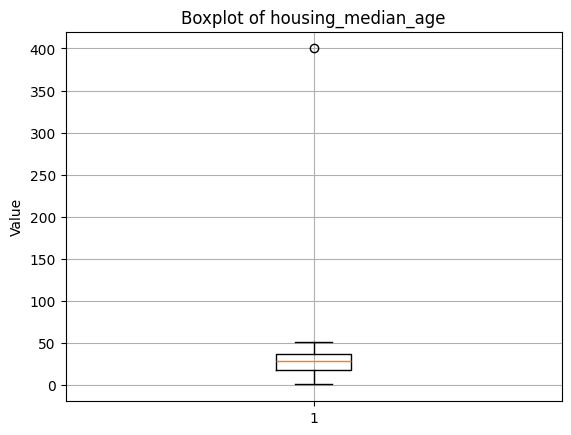

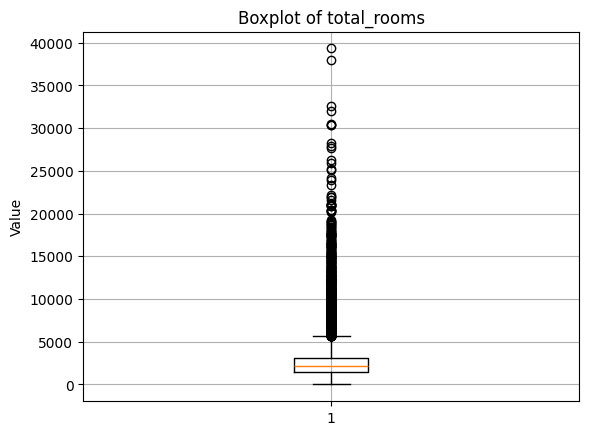

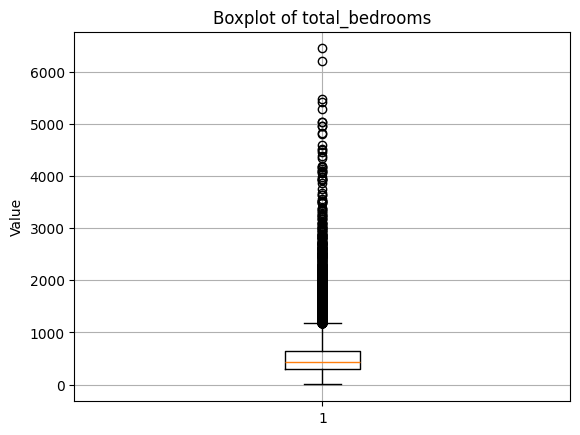

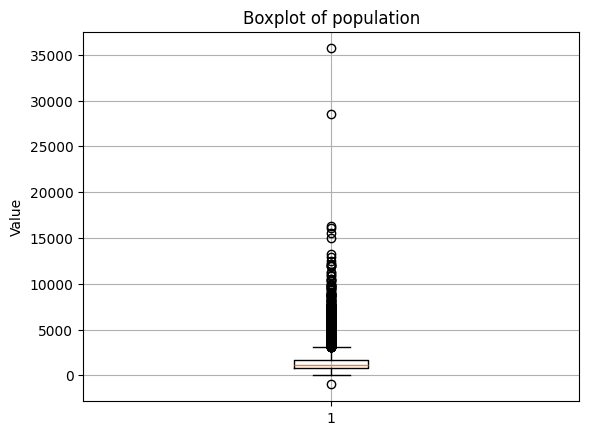

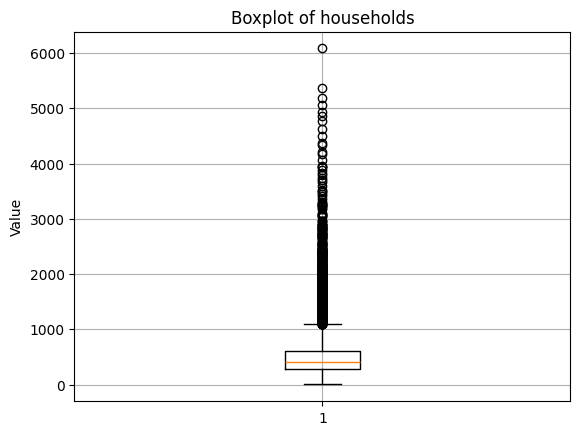

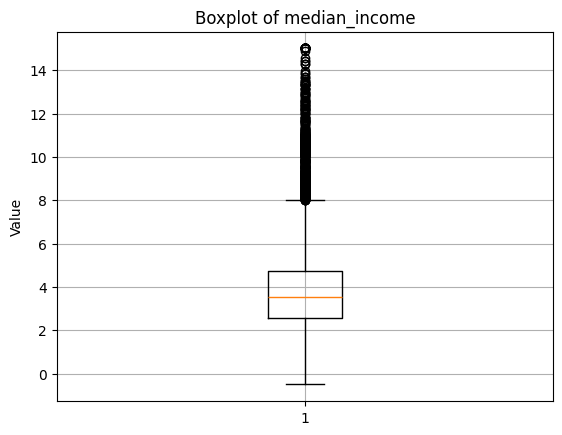

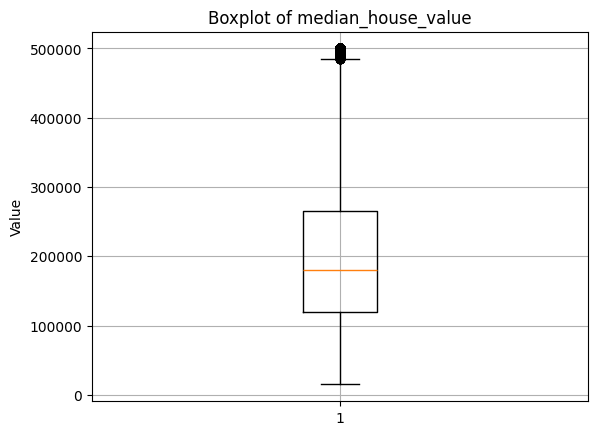

In [98]:
for column in df.columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [99]:
X = df.drop(columns='median_house_value', axis=1)
y = df['median_house_value']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 49642646432.80349
R² Score: -2.8374824945058053


In [103]:
ns = 400   # don’t use np for number of people, as it hides the np that stands for numpy!

nf = 100   # number of features

errate = 0.008   # error rate

vals = np.random.rand(ns,nf)   # uniform random numbers in [0,1]

errs = vals<errate  # Is True for specified error rate

nerrs = np.sum(errs,axis=1)   # number of errors per subject

print(np.sum(nerrs==0)/ns*100)   # percentage of subjects with complete records (no errors)

46.25
